In [1]:
import sys
sys.path.insert(0, '../src')
from lib import train, dataset 
import torch 
import torch.nn as nn
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader

In [25]:
param_file = '../data/derived/model_b-64_lr-1e-04_con-right-hand-foot-tongue_epochs_50.pt'
device='cpu'
model = torch.load(param_file, map_location=device)

In [26]:
for contrast in ['right-hand', 'right-foot', 'left-hand', 'left-foot', 'tongue']:
    dpath = '..'
    data_dir = '/srv/tempdd/egermani/hcp_many_pipelines_preprocess'
    label_file = f'{dpath}/data/valid_dataset.csv'
    label_column = 'Pipeline'
    label_list = np.unique(pd.read_csv(label_file)[label_column])
    contrast_list = [contrast]
    print('Contrast:', contrast)
    valid_dataset = dataset.ClassifDataset(f'{data_dir}/resampled_mni_masked_normalized_res_4', 
                                   label_file, label_column, label_list, contrast_list)

    distance = nn.CrossEntropyLoss()
    valid_dataset = DataLoader(valid_dataset, batch_size=64)

    train.validate(model, valid_dataset, distance, device)

Contrast: right-hand


/srv/tempdd/egermani/pipeline_classification/results/../src/lib/model.py:84: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


Validation accuracy: 0.96625
Contrast: right-foot


/srv/tempdd/egermani/pipeline_classification/results/../src/lib/model.py:84: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


Validation accuracy: 0.9847916666666666
Contrast: left-hand


/srv/tempdd/egermani/pipeline_classification/results/../src/lib/model.py:84: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


Validation accuracy: 0.32479166666666665
Contrast: left-foot


/srv/tempdd/egermani/pipeline_classification/results/../src/lib/model.py:84: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


Validation accuracy: 0.5579166666666666
Contrast: tongue


/srv/tempdd/egermani/pipeline_classification/results/../src/lib/model.py:84: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.softmax(x)


Validation accuracy: 0.9854166666666667


Contrast: right-hand
fsl-5-0-0


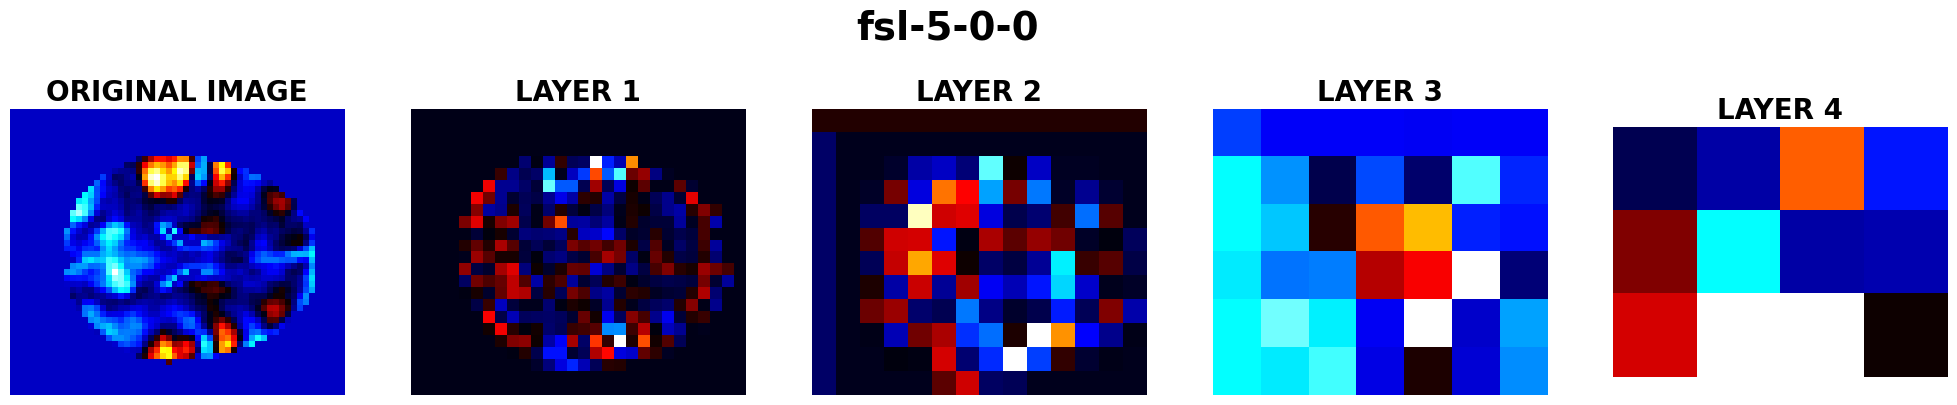

fsl-5-0-1


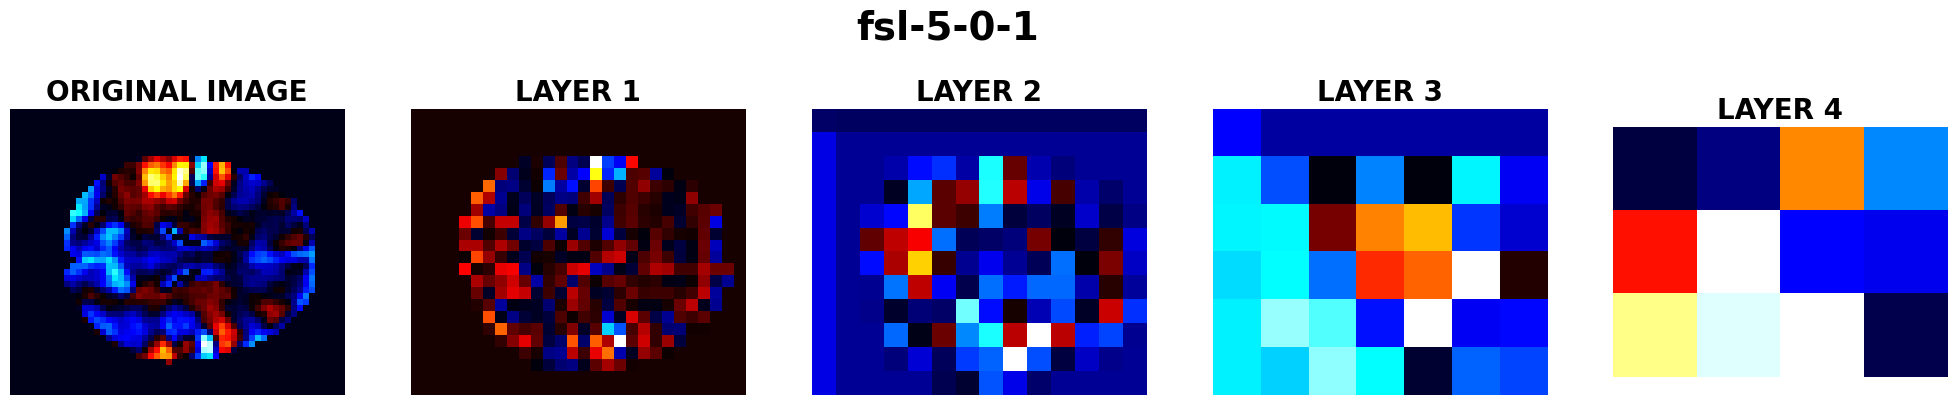

fsl-5-24-0


fsl-5-24-1


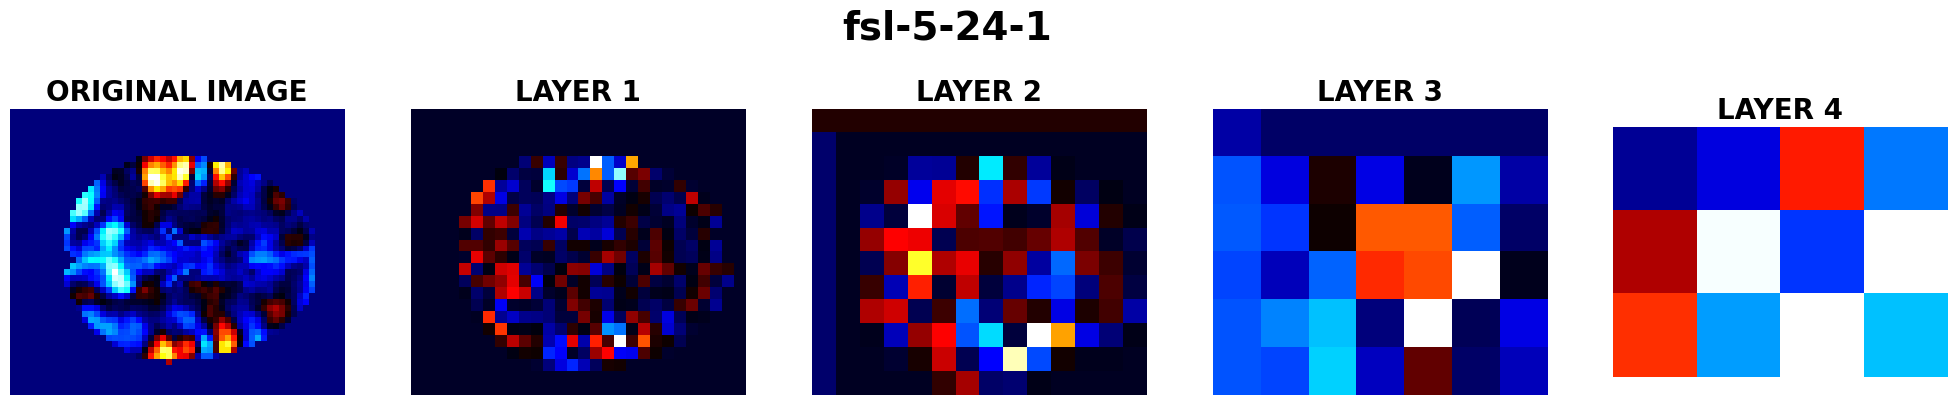

fsl-5-6-0


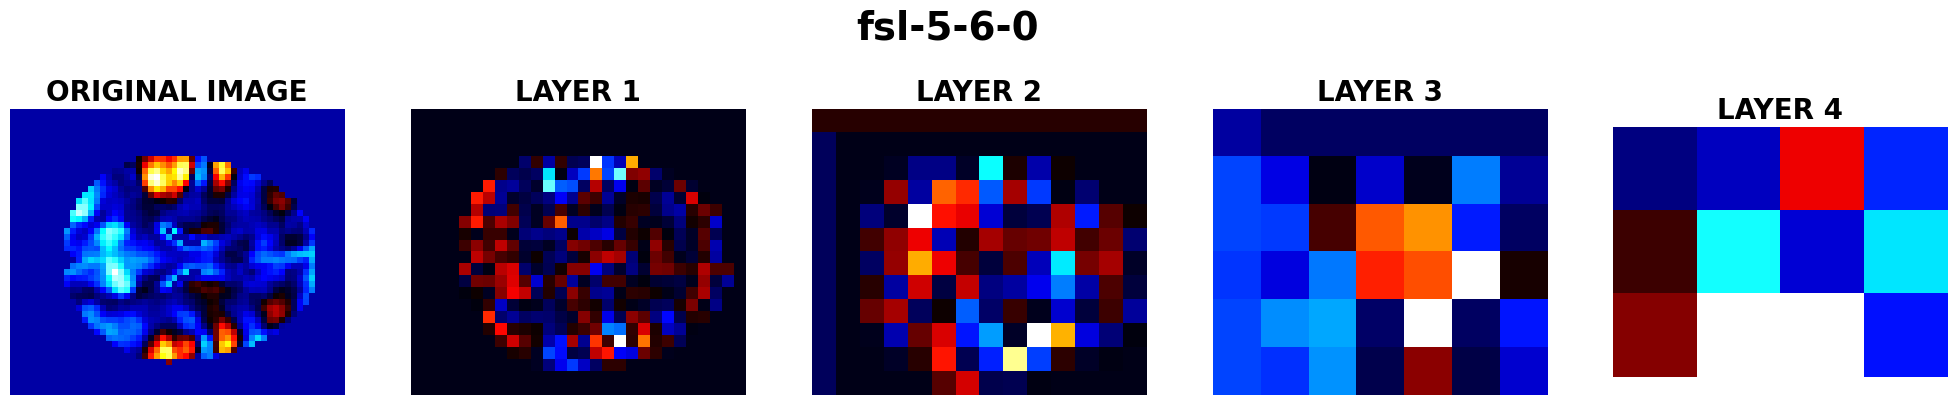

fsl-5-6-1


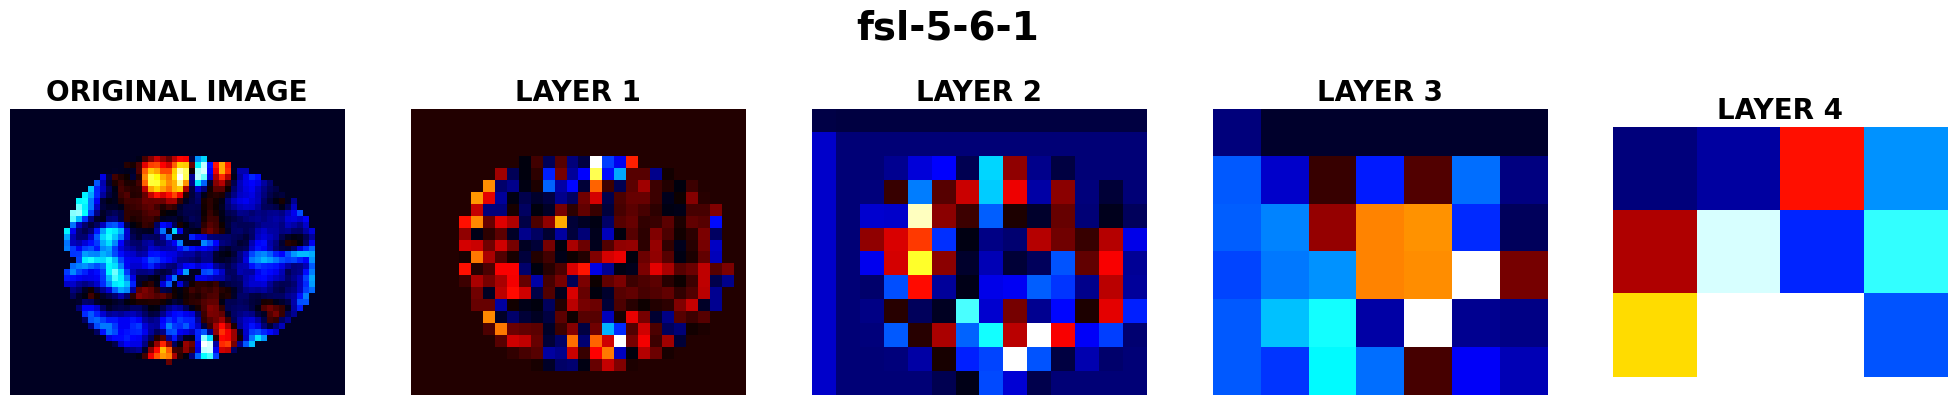

fsl-8-0-0


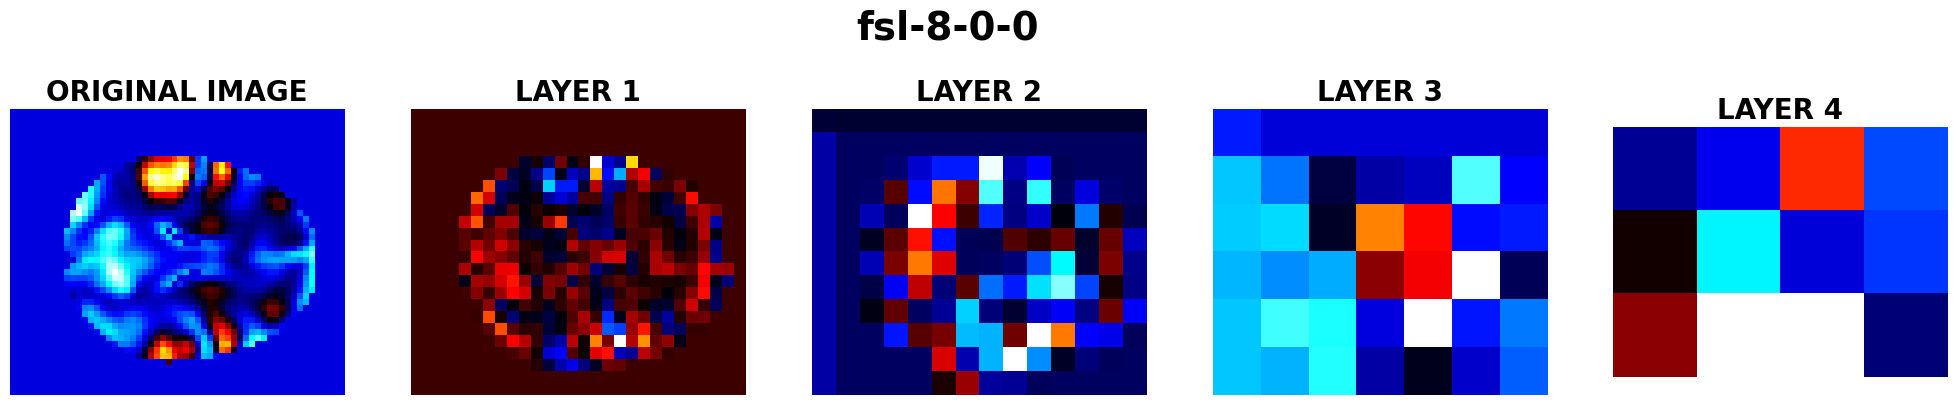

fsl-8-0-1


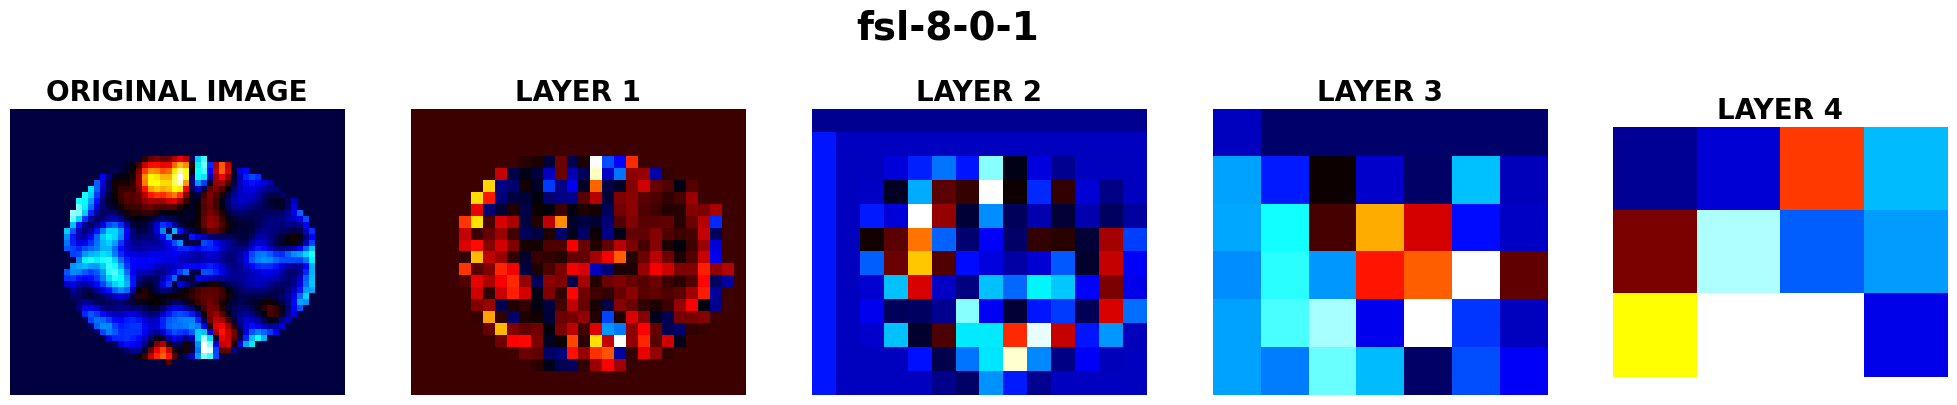

fsl-8-24-0


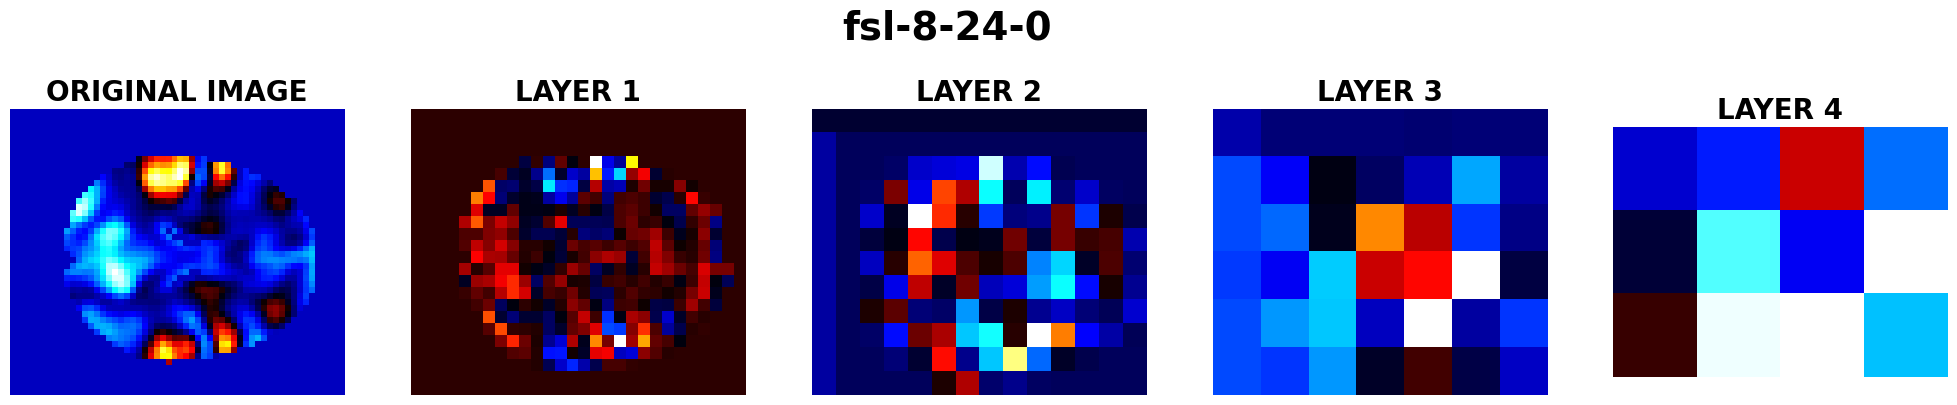

fsl-8-24-1


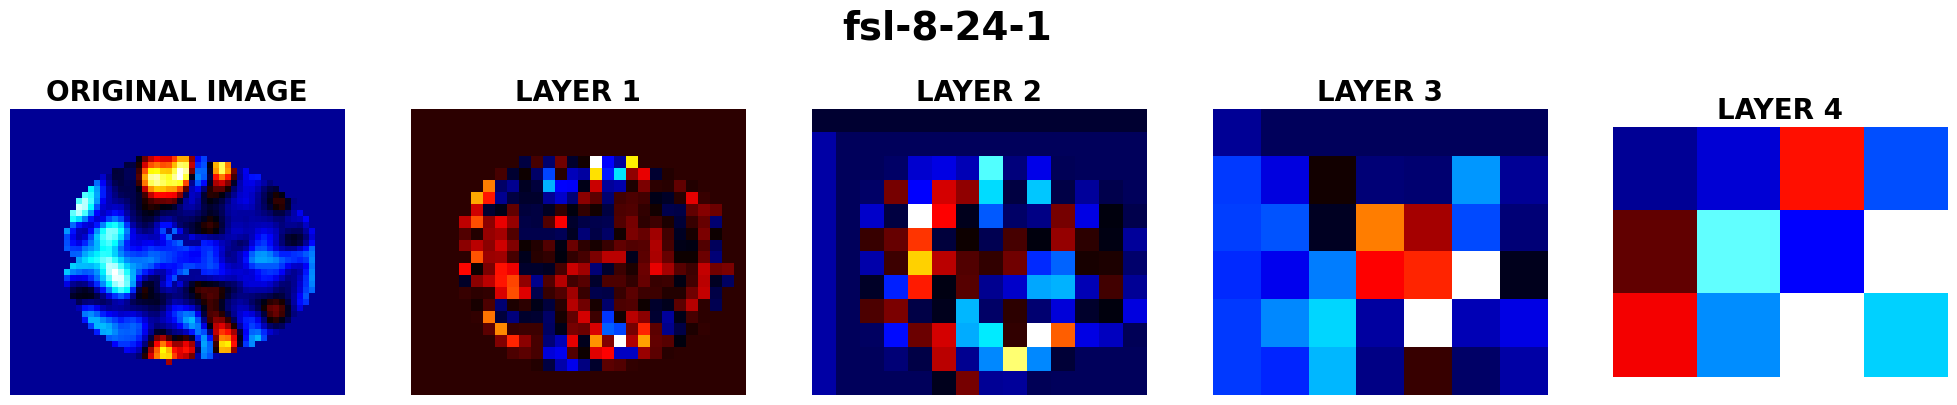

fsl-8-6-0


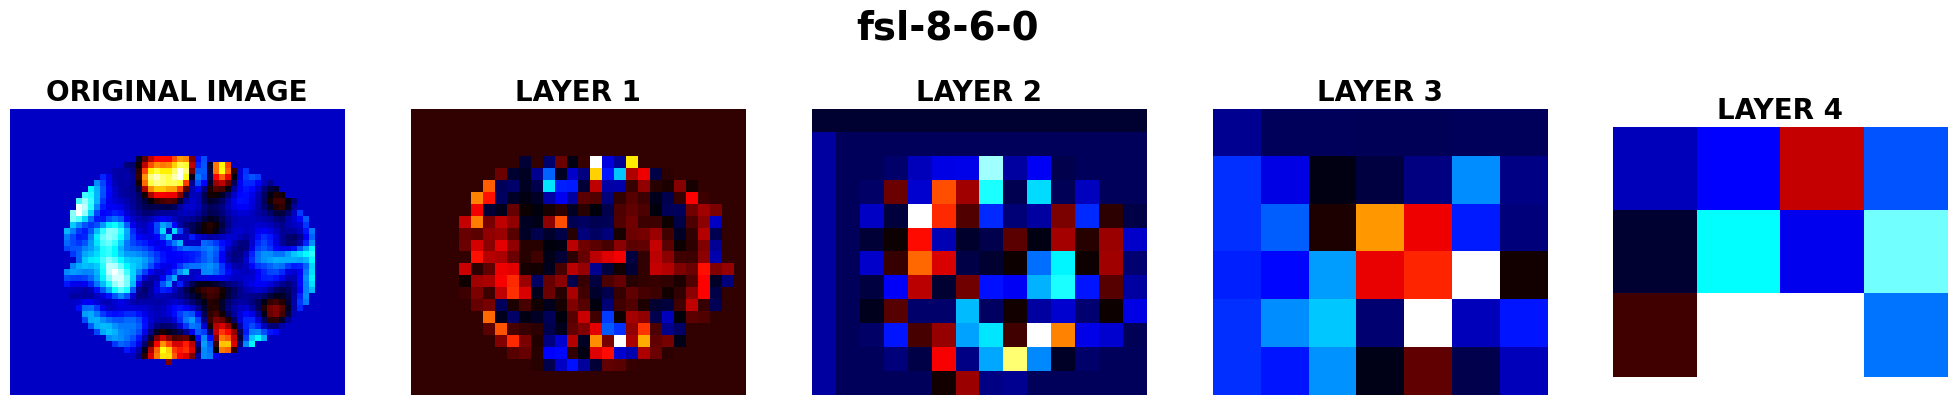

fsl-8-6-1


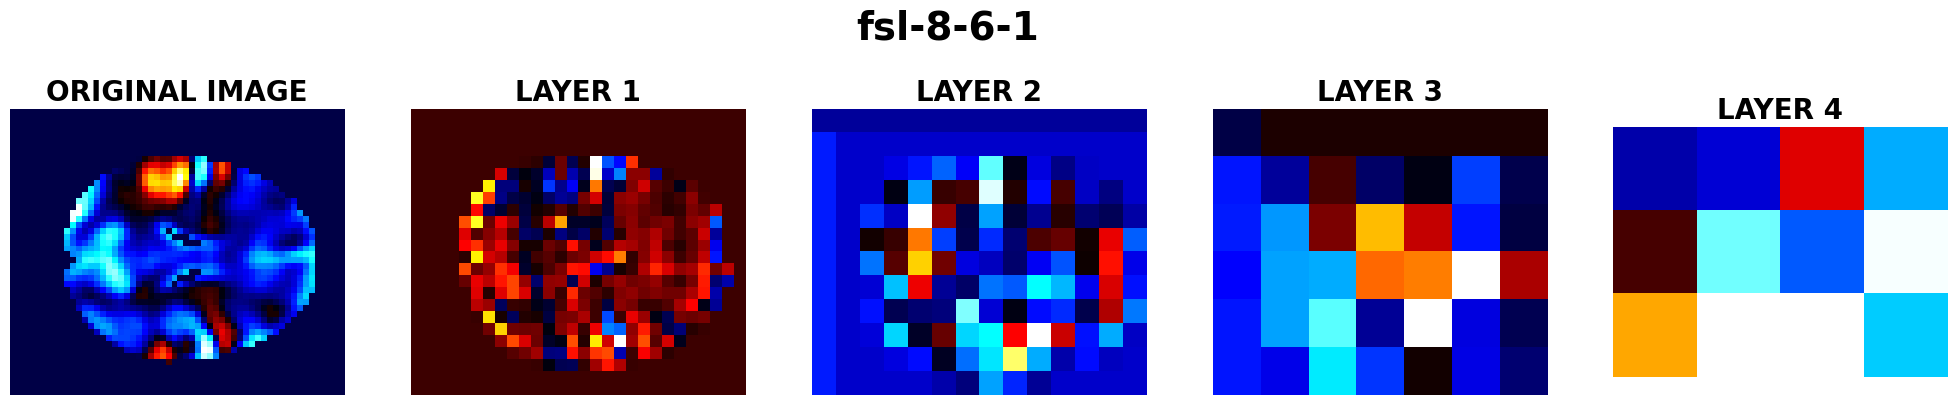

spm-5-0-0


spm-5-0-1


spm-5-24-0


spm-5-24-1


spm-5-6-0


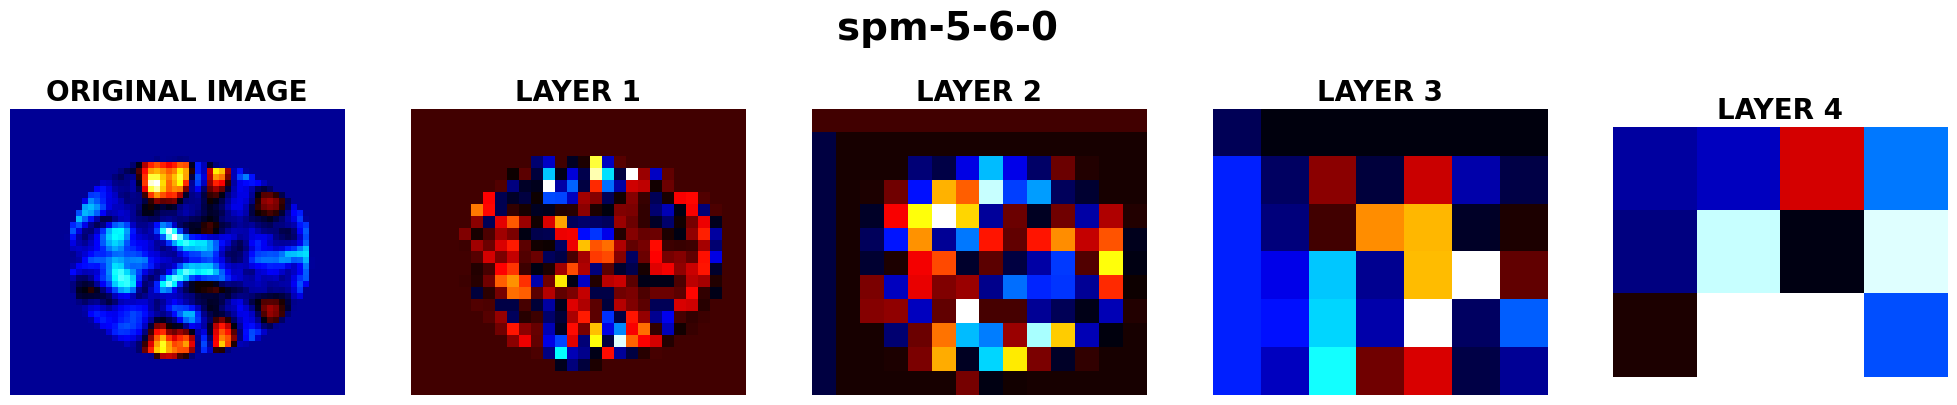

spm-5-6-1


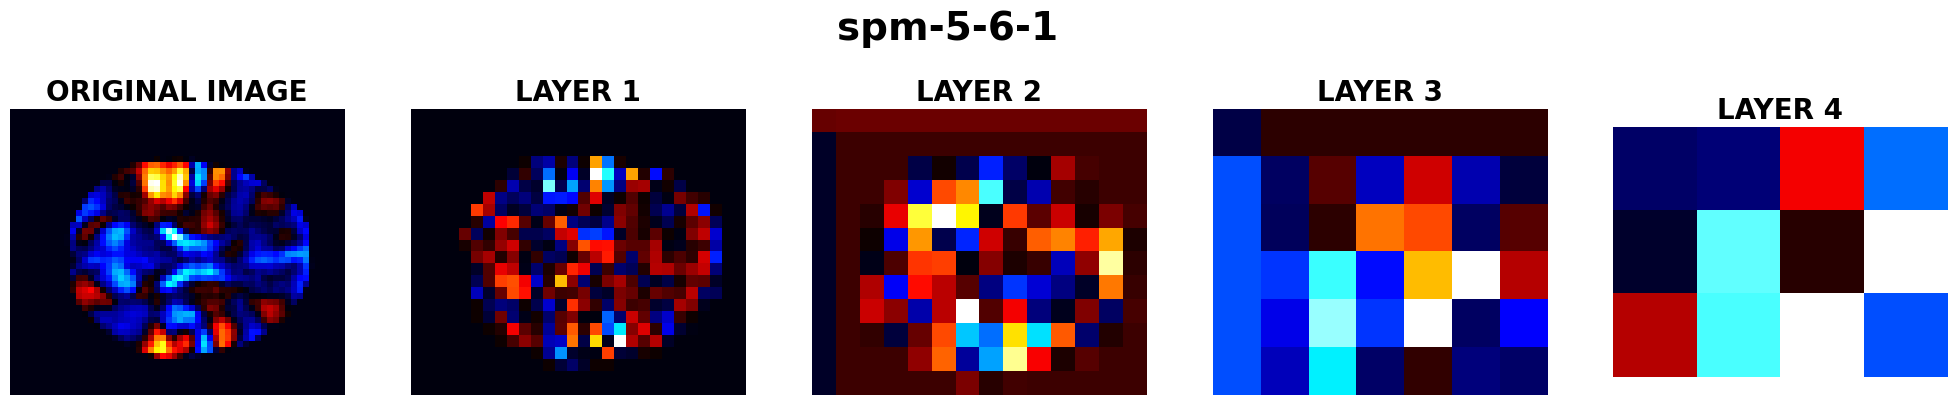

spm-8-0-0


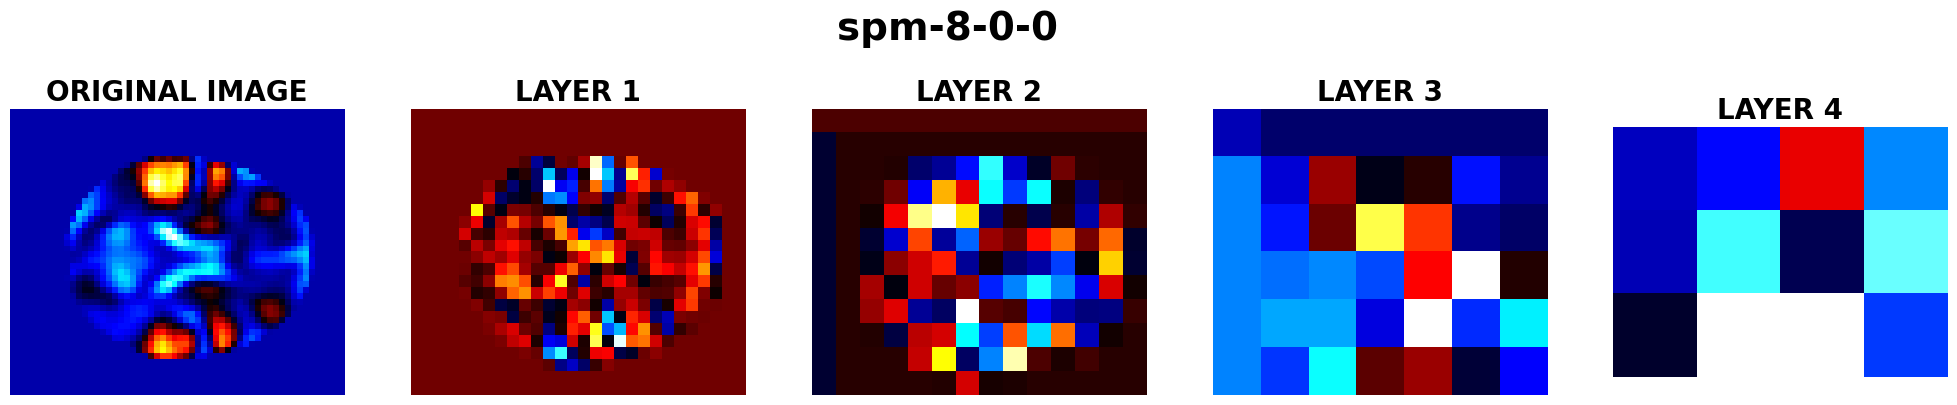

spm-8-0-1


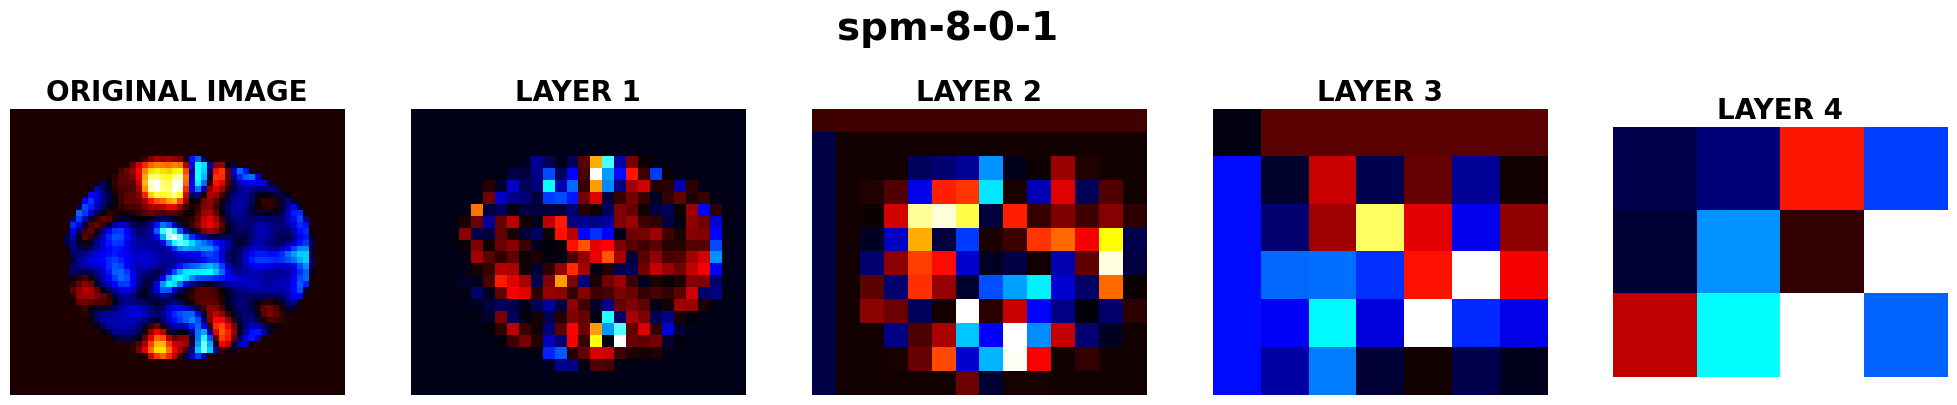

spm-8-24-0


spm-8-24-1


spm-8-6-0


spm-8-6-1


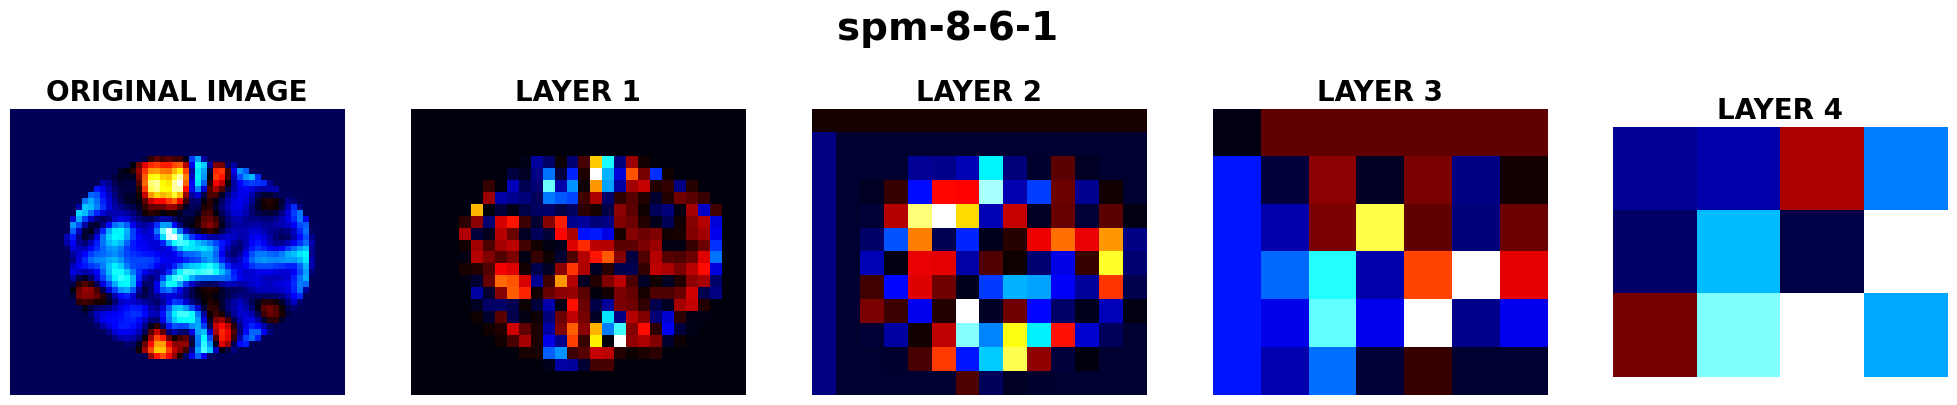

Contrast: right-foot
fsl-5-0-0


KeyboardInterrupt: 

In [24]:
import feature_visualization
classes_names = label_list

for contrast in ['right-hand', 'right-foot', 'left-hand', 'left-foot', 'tongue']:
    dpath = '..'
    data_dir = '/srv/tempdd/egermani/hcp_many_pipelines_preprocess'
    label_file = f'{dpath}/data/valid_dataset.csv'
    label_column = 'Pipeline'
    label_list = np.unique(pd.read_csv(label_file)[label_column])
    contrast_list = [contrast]
    print('Contrast:', contrast)
    valid_dataset = dataset.ClassifDataset(f'{data_dir}/resampled_mni_masked_normalized_res_4', 
                                   label_file, label_column, label_list, contrast_list)

    for i, classes in enumerate(classe_names):
        print(classes)
        p=True
        feature_visualization.visualize_features(param_file, valid_dataset, classe=classes, 
                                                 classe_name=classes_names[i], types=contrast, print_title=p)